In [1]:
# library imports:
# mesa
from mesa import Agent, Model
from mesa.datacollection import DataCollector
# load all available schedulers
import mesa.time as time
import math
import random
# matplot lib for plotting, numpy for all sorts of useful math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# basic python statistics
import statistics as stat

# import pandas
import pandas as pd

# Required libraries for animation
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc, collections
from IPython.display import HTML

from model import RecyclingModel
from main import RecyclingModel

In [2]:
def run_model():
   model = RecyclingModel()
   number_of_steps = 240
   for i in range(number_of_steps):
      model.step()
   return model.datacollector_waste.get_model_vars_dataframe()

In [6]:
iterations = 300
averages = []
for i in range(iterations):
    dataframe = run_model()
    dataframe = dataframe[1:241]
    dataframe["average_cities"] = (dataframe["Percentage recycled Rotterdam"] + dataframe["Percentage recycled Vlaardingen"] + dataframe["Percentage recycled Schiedam"])/3
    averages.append(dataframe['average_cities'].mean())
    

In [17]:
import statistics
moving_averages = []
for i in range(len(averages)):
    if i >0:
        moving_averages.append(statistics.mean(averages[0:i]))

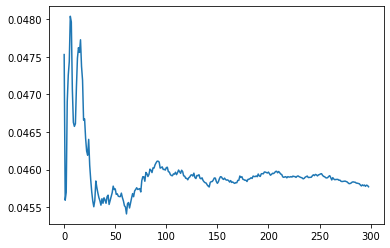

In [19]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.plot(moving_averages)
